# Heart Disease Analysis & Prediction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year 

Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('heart.csv')
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


#### Let's check for missing values and summarize the dataset:

In [7]:
data_types = df.dtypes
missing_values = df.isnull().sum()
data_summary = pd.DataFrame({
    "Data Type": data_types,
    "Missing Values": missing_values
})
data_summary

,Data Type,Missing Values
Age,int64,0
Sex,object,0
ChestPainType,object,0
RestingBP,int64,0
Cholesterol,int64,0
FastingBS,int64,0
RestingECG,object,0
MaxHR,int64,0
ExerciseAngina,object,0
Oldpeak,float64,0


### Data Description
- Data Types: The dataset consists of a mix of categorical and numerical data types.
- Missing Values: There are no missing values in the dataset.


### Data Analysis
Let's perform exploratory data analysis (EDA) to identify patterns and relationships in the data.

### Key Analysis Points:

- Distribution of Numerical Variables: Plot histograms to observe the distribution of numerical features such as Age, RestingBP, Cholesterol, MaxHR, and Oldpeak.

- Categorical Variables Analysis: Use bar plots to examine the distribution of categorical variables like Sex, ChestPainType, RestingECG, ExerciseAngina, and ST_Slope.

- Correlation Analysis: Investigate the correlation between features and the target variable HeartDisease.

<Figure size 1200x800 with 0 Axes>

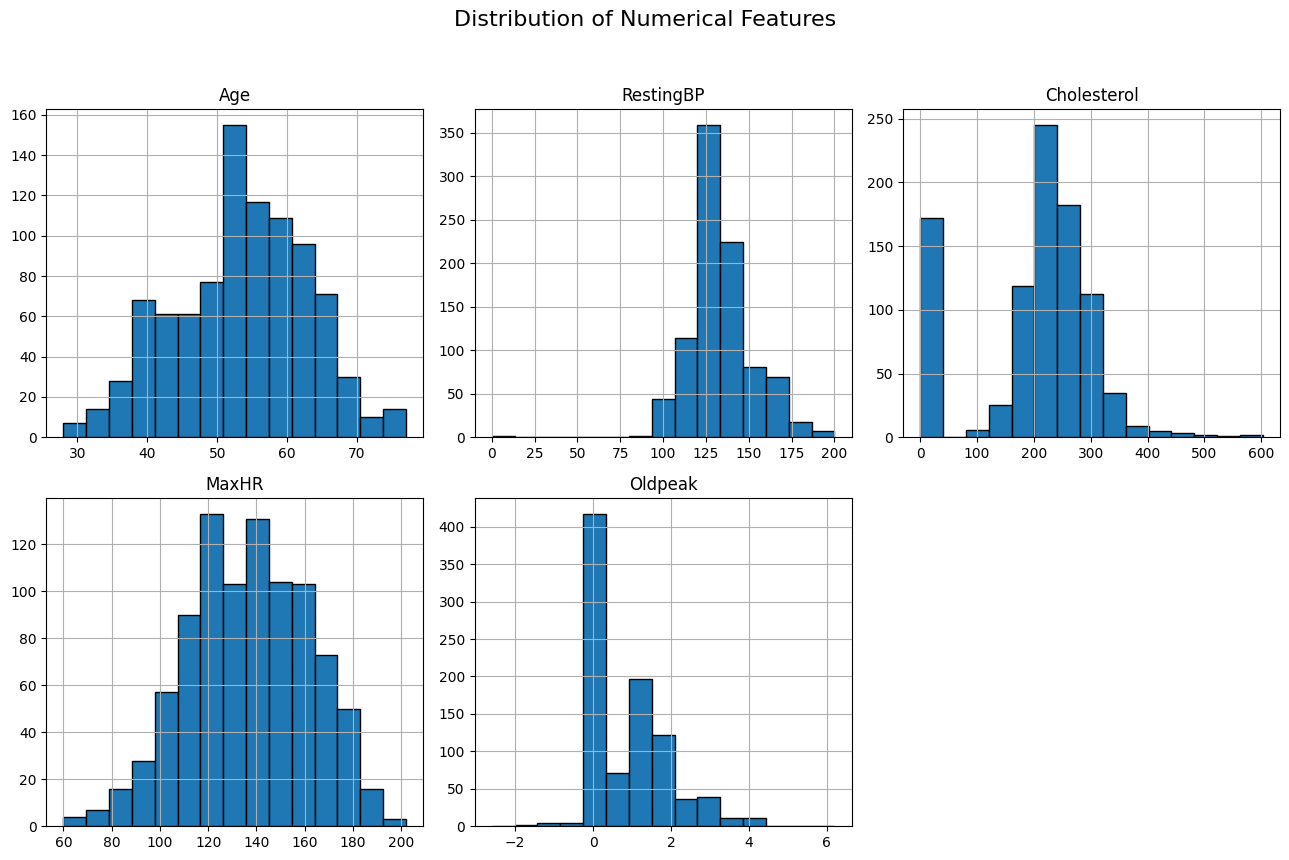

<Figure size 640x480 with 0 Axes>

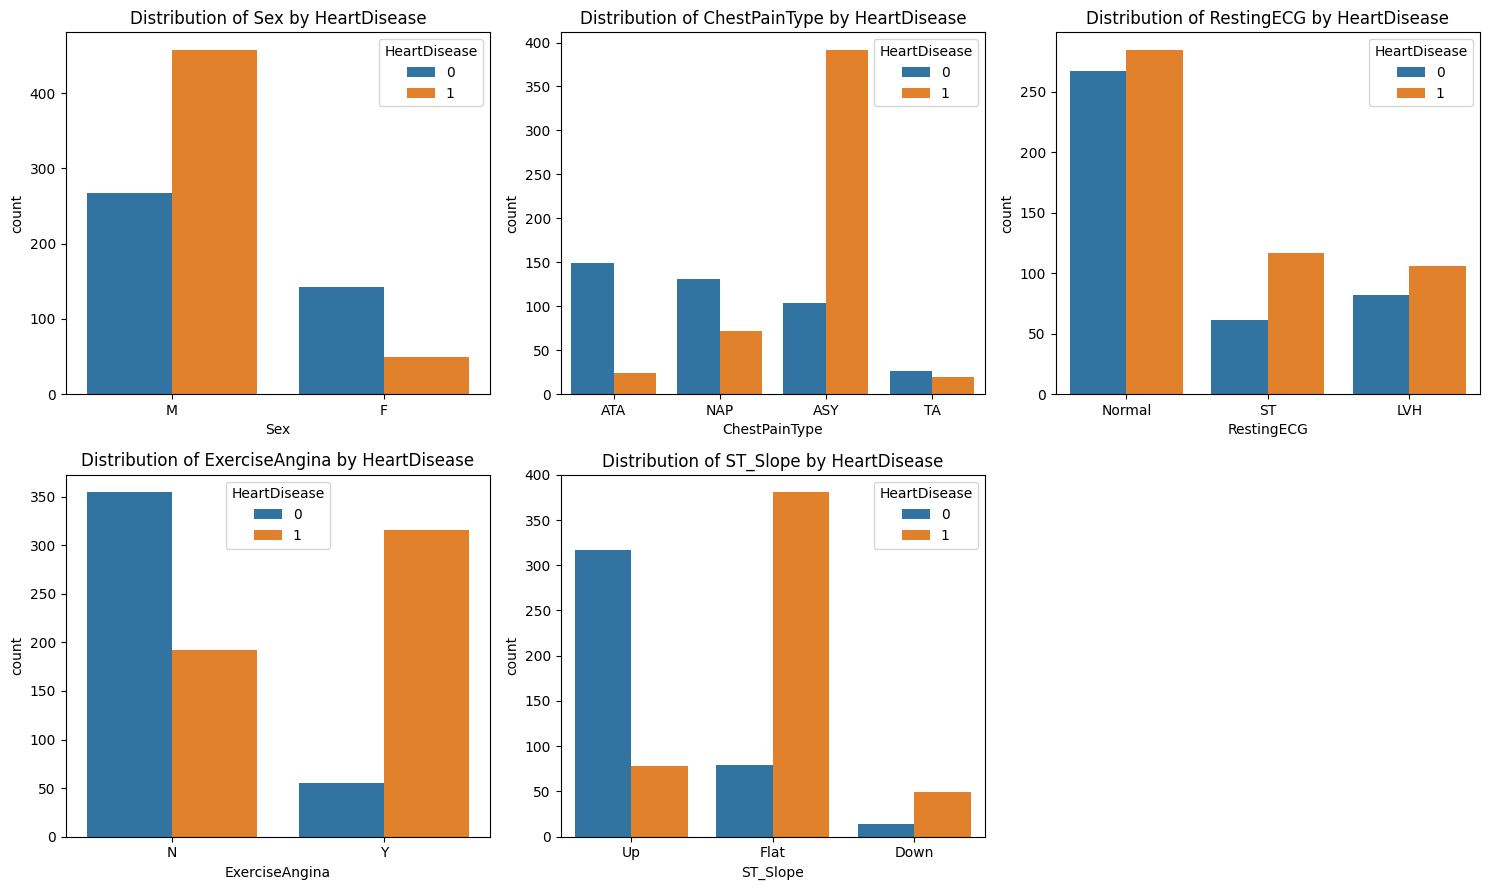

<Figure size 640x480 with 0 Axes>

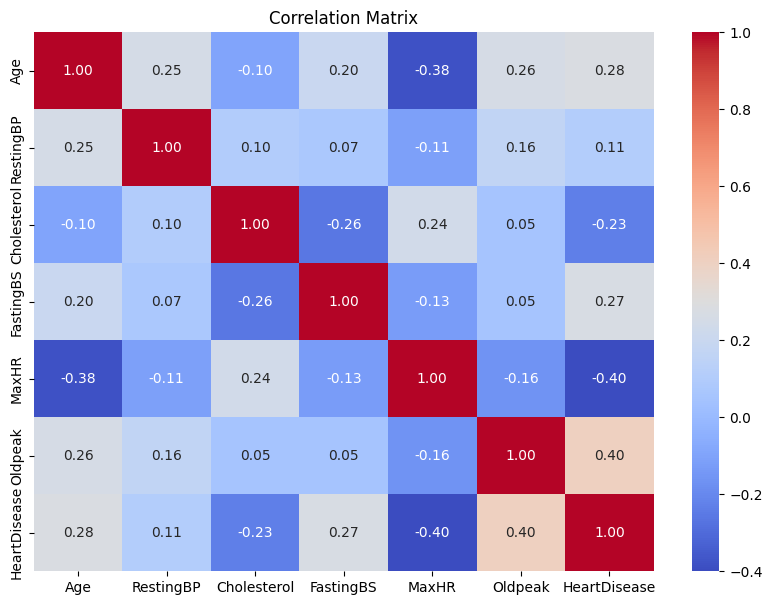

<Figure size 640x480 with 0 Axes>

In [4]:
plt.figure(figsize=(12, 8))

# Plot histograms for numerical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[numerical_features].hist(bins=15, figsize=(13, 9), layout=(2, 3), edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
plt.savefig('numerical_features.png')

# Plot bar plots for categorical features
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
plt.figure(figsize=(15, 9))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=feature, hue='HeartDisease')
    plt.title(f'Distribution of {feature} by HeartDisease')
plt.tight_layout()
plt.show()
plt.savefig('categorical_features.png')

# Correlation heatmap
plt.figure(figsize=(10, 7))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
plt.savefig('correlation_matrix.png')


### Data Analysis
- **Age**: The distribution is relatively uniform with a slight peak around ages 50-60.
- **RestingBP**: Most values range between 120 and 140 mm Hg.
- **Cholesterol**: There is a wide spread with a concentration around 200-250 mg/dl.
- **MaxHR**: The distribution is skewed towards higher values, with a peak around 150-170.
- **Oldpeak**: The values are concentrated near zero with a few outliers.
- **Sex**: The dataset has a slightly higher number of males, with males showing a higher incidence of heart disease.
- **ChestPainType**: ASY (Asymptomatic) is the most common type associated with heart disease.
- **RestingECG**: Most patients have normal ECG results.
- **ExerciseAngina**: More patients do not experience exercise-induced angina, but those who do have a higher incidence of heart disease.
- **ST_Slope**: 'Flat' ST slope is strongly associated with heart disease.

The target variable HeartDisease has moderate correlations with ChestPainType, MaxHR, and ExerciseAngina.
Other features show varying degrees of correlation but are generally weak.

In [6]:
# Encode categorical variables
encoded_data = df.copy()
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col])
    label_encoders[col] = le

# Split the dataset
X = encoded_data.drop('HeartDisease', axis=1)
y = encoded_data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease'])
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("\n")
    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": report
    }

# results


Model: Logistic Regression
Accuracy: 0.842391304347826
Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.77      0.88      0.82        77
   Heart Disease       0.91      0.81      0.86       107

        accuracy                           0.84       184
       macro avg       0.84      0.85      0.84       184
    weighted avg       0.85      0.84      0.84       184



Model: Random Forest
Accuracy: 0.875
Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.84      0.87      0.85        77
   Heart Disease       0.90      0.88      0.89       107

        accuracy                           0.88       184
       macro avg       0.87      0.87      0.87       184
    weighted avg       0.88      0.88      0.88       184





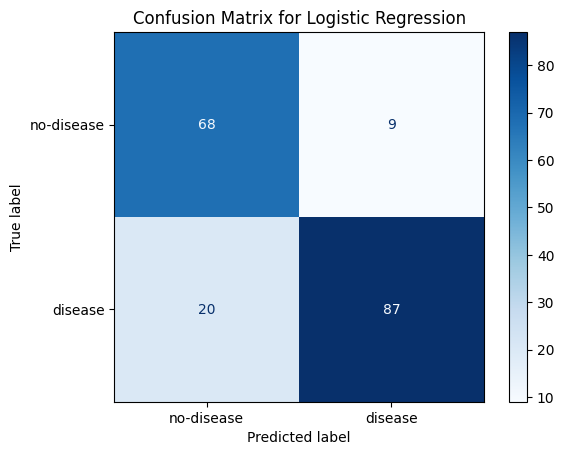

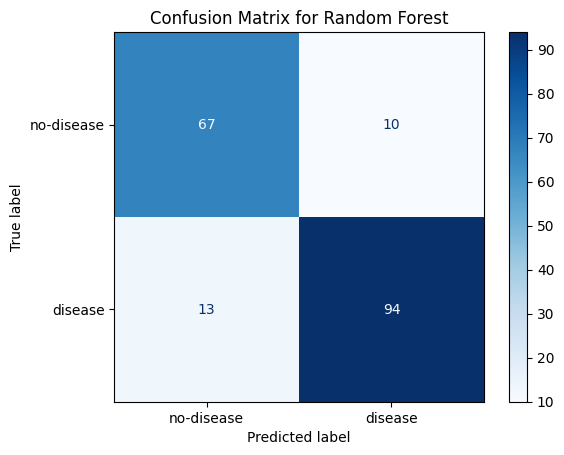

In [10]:
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no-disease', 'disease'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

### Results
The Random Forest model outperformed Logistic Regression in terms of accuracy and overall classification metrics, making it a more reliable model for predicting heart disease in this dataset.

### Conclusion
The analysis indicates that certain features like ChestPainType, ExerciseAngina, and MaxHR are significant predictors of heart disease. The Random Forest model provides a robust prediction capability, achieving an accuracy of 88%. Future efforts could explore additional models or feature engineering to improve prediction accuracy further.